# 🔍 Exploratory Data Analysis: RT-IOT2022 Dataset

## UCI Machine Learning Repository - IoT Network Traffic Dataset

This notebook performs comprehensive EDA on the RT-IOT2022 dataset, which contains network traffic data captured from IoT devices. The dataset includes various network flow features and attack type labels for intrusion detection analysis.

---

In [18]:
# Core Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Custom color palette
COLORS = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
          '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9',
          '#F8B500', '#00CED1', '#FF69B4', '#32CD32', '#FF4500']

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [7]:
df = pd.read_csv('data.txt', sep=',')

In [10]:
# Preview the first few rows
print("Dataset Preview (First 5 Rows):")
print("="*80)
df.head()


Dataset Preview (First 5 Rows):


,index,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


## 1. Dataset Overview & Basic Information

In [12]:
# Dataset Shape and Basic Info
print("DATASET OVERVIEW")
print("="*60)
print(f"Number of Samples (Rows): {df.shape[0]:,}")
print(f"Number of Features (Columns): {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")
print()

# Column types overview
print("\nCOLUMN TYPES:")
print("-"*40)
print(df.dtypes.value_counts())

DATASET OVERVIEW
Number of Samples (Rows): 123,117
Number of Features (Columns): 85
Memory Usage: 99.15 MB

Duplicate Rows: 0 (0.00%)


COLUMN TYPES:
----------------------------------------
float64    56
int64      26
object      3
Name: count, dtype: int64


In [13]:
# Detailed column information
print("COMPLETE COLUMN LISTING:")
print("="*80)
print(f"{'#':<4} {'Column Name':<40} {'Data Type':<15} {'Non-Null Count':<15}")
print("-"*80)

for i, col in enumerate(df.columns):
    dtype = str(df[col].dtype)
    non_null = df[col].notna().sum()
    print(f"{i+1:<4} {col:<40} {dtype:<15} {non_null:,}")
    
print("-"*80)
print(f"Total columns: {len(df.columns)}")

COMPLETE COLUMN LISTING:
#    Column Name                              Data Type       Non-Null Count 
--------------------------------------------------------------------------------
1    index                                    int64           123,117
2    id.orig_p                                int64           123,117
3    id.resp_p                                int64           123,117
4    proto                                    object          123,117
5    service                                  object          123,117
6    flow_duration                            float64         123,117
7    fwd_pkts_tot                             int64           123,117
8    bwd_pkts_tot                             int64           123,117
9    fwd_data_pkts_tot                        int64           123,117
10   bwd_data_pkts_tot                        int64           123,117
11   fwd_pkts_per_sec                         float64         123,117
12   bwd_pkts_per_sec                         

## 2. Missing Values Analysis

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Filter to show only columns with missing values
missing_with_values = missing_df[missing_df['Missing Values'] > 0]

print("MISSING VALUES ANALYSIS")
print("="*60)

if len(missing_with_values) == 0:
    print("No missing values found in the dataset!")
    print(f"   Total cells checked: {df.shape[0] * df.shape[1]:,}")
else:
    print(f"{len(missing_with_values)} columns have missing values:")
    print()
    display(missing_with_values)
    
    # Visualize missing values
    if len(missing_with_values) > 0:
        fig, ax = plt.subplots(figsize=(12, max(4, len(missing_with_values) * 0.3)))
        colors = ['#FF6B6B' if x > 10 else '#4ECDC4' for x in missing_with_values['Percentage (%)']]
        missing_with_values['Percentage (%)'].plot(kind='barh', ax=ax, color=colors)
        ax.set_xlabel('Missing Percentage (%)')
        ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

MISSING VALUES ANALYSIS
No missing values found in the dataset!
   Total cells checked: 10,464,945


## 3. Target Variable Analysis (Attack Types)

In [16]:
# Attack Type Distribution Analysis
print("TARGET VARIABLE: Attack_type")
print("="*60)

attack_counts = df['Attack_type'].value_counts()
attack_percentages = (attack_counts / len(df) * 100).round(2)

attack_summary = pd.DataFrame({
    'Count': attack_counts,
    'Percentage (%)': attack_percentages
})

print(f"\nNumber of unique attack types: {df['Attack_type'].nunique()}")
print(f"Total samples: {len(df):,}")
print()
print(attack_summary)
print()

# Check class imbalance
max_class = attack_counts.max()
min_class = attack_counts.min()
imbalance_ratio = max_class / min_class
print(f"⚖️ Class Imbalance Ratio (Max/Min): {imbalance_ratio:.2f}:1")

TARGET VARIABLE: Attack_type

Number of unique attack types: 12
Total samples: 123,117

                            Count  Percentage (%)
Attack_type                                      
DOS_SYN_Hping               94659           76.89
Thing_Speak                  8108            6.59
ARP_poisioning               7750            6.29
MQTT_Publish                 4146            3.37
NMAP_UDP_SCAN                2590            2.10
NMAP_XMAS_TREE_SCAN          2010            1.63
NMAP_OS_DETECTION            2000            1.62
NMAP_TCP_scan                1002            0.81
DDOS_Slowloris                534            0.43
Wipro_bulb                    253            0.21
Metasploit_Brute_Force_SSH     37            0.03
NMAP_FIN_SCAN                  28            0.02

⚖️ Class Imbalance Ratio (Max/Min): 3380.68:1


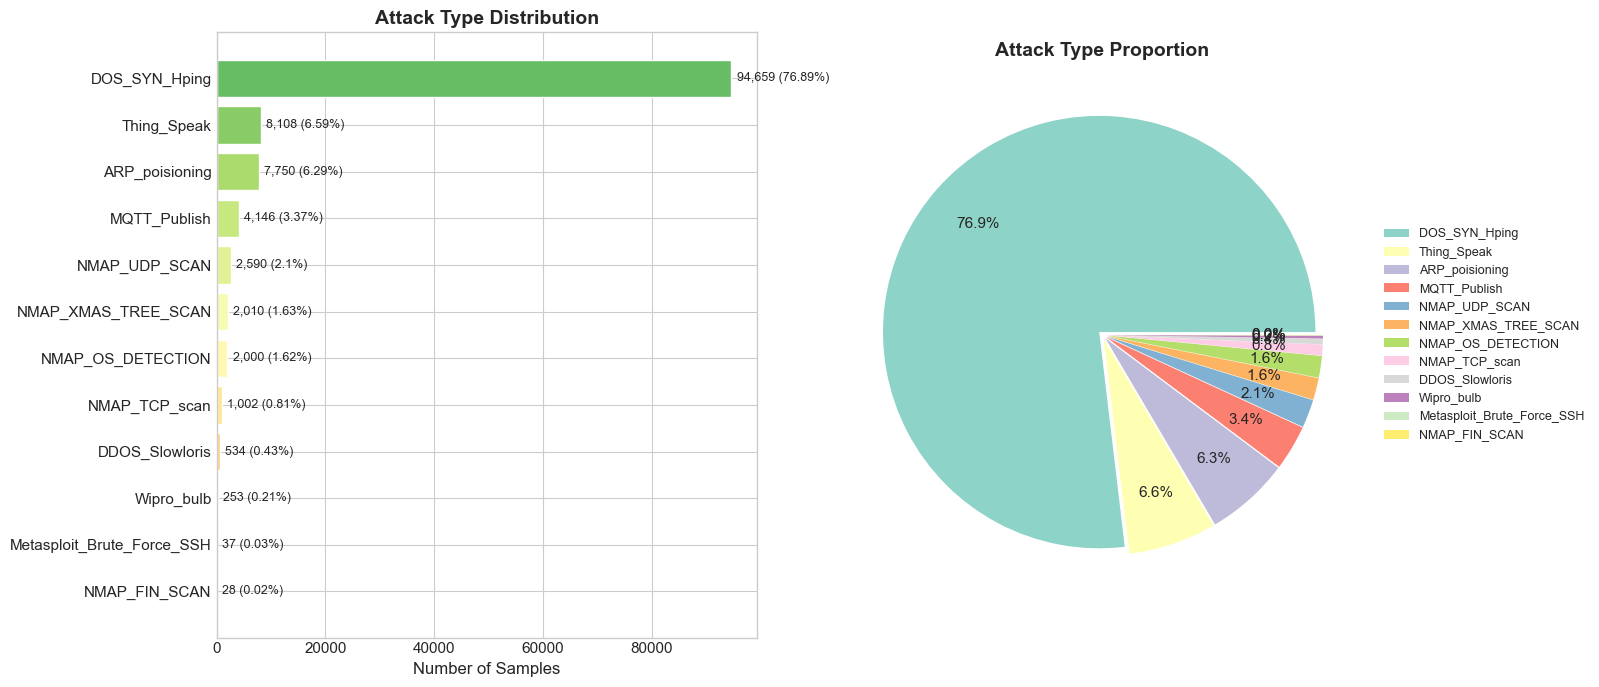

In [19]:
# Visualize Attack Type Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar Plot
ax1 = axes[0]
colors_bar = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(attack_counts)))
bars = ax1.barh(attack_counts.index, attack_counts.values, color=colors_bar, edgecolor='white')
ax1.set_xlabel('Number of Samples', fontsize=12)
ax1.set_title('Attack Type Distribution', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add value labels
for bar, count, pct in zip(bars, attack_counts.values, attack_percentages.values):
    ax1.text(count + max(attack_counts)*0.01, bar.get_y() + bar.get_height()/2, 
             f'{count:,} ({pct}%)', va='center', fontsize=9)

# Pie Chart
ax2 = axes[1]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(attack_counts)))
wedges, texts, autotexts = ax2.pie(
    attack_counts.values, 
    labels=None,
    autopct='%1.1f%%',
    colors=colors_pie,
    explode=[0.02] * len(attack_counts),
    pctdistance=0.75
)
ax2.set_title('Attack Type Proportion', fontsize=14, fontweight='bold')
ax2.legend(attack_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

plt.tight_layout()
plt.savefig('attack_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## 4.Statistical Summary of Numerical Features

In [20]:
# Get numerical columns (excluding index column)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'index' in numerical_cols:
    numerical_cols.remove('index')

print(f"NUMERICAL FEATURES SUMMARY")
print("="*60)
print(f"Total numerical features: {len(numerical_cols)}")
print()

# Comprehensive statistics
stats_df = df[numerical_cols].describe().T
stats_df['median'] = df[numerical_cols].median()
stats_df['skewness'] = df[numerical_cols].skew()
stats_df['kurtosis'] = df[numerical_cols].kurtosis()
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['iqr'] = stats_df['75%'] - stats_df['25%']

# Reorder columns
stats_df = stats_df[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'iqr', 'skewness', 'kurtosis']]
stats_df.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Q1', 'Q2', 'Q3', 'Max', 'Range', 'IQR', 'Skewness', 'Kurtosis']

print("Descriptive Statistics:")
stats_df.round(2)

NUMERICAL FEATURES SUMMARY
Total numerical features: 81

Descriptive Statistics:


,Count,Mean,Median,Std,Min,Q1,Q2,Q3,Max,Range,IQR,Skewness,Kurtosis
id.orig_p,123117.0,34639.26,37221.0,19070.62,0.0,17702.0,37221.0,50971.0,6.553500e+04,6.553500e+04,33269.0,-0.23,-1.19
id.resp_p,123117.0,1014.31,21.0,5256.37,0.0,21.0,21.0,21.0,6.538900e+04,6.538900e+04,0.0,7.98,70.58
flow_duration,123117.0,3.81,0.0,130.01,0.0,0.0,0.0,0.0,2.172834e+04,2.172834e+04,0.0,120.96,16604.65
fwd_pkts_tot,123117.0,2.27,1.0,22.34,0.0,1.0,1.0,1.0,4.345000e+03,4.345000e+03,0.0,121.44,18970.64
bwd_pkts_tot,123117.0,1.91,1.0,33.02,0.0,1.0,1.0,1.0,1.011200e+04,1.011200e+04,0.0,249.91,73012.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle.avg,123117.0,1664984.76,0.0,9007063.99,0.0,0.0,0.0,0.0,3.000000e+08,3.000000e+08,0.0,7.41,96.88
idle.std,123117.0,45501.83,0.0,1091361.40,0.0,0.0,0.0,0.0,1.208029e+08,1.208029e+08,0.0,55.85,4543.93
fwd_init_window_size,123117.0,6118.91,64.0,18716.31,0.0,64.0,64.0,64.0,6.553500e+04,6.553500e+04,0.0,2.79,5.76
bwd_init_window_size,123117.0,2739.78,0.0,10018.85,0.0,0.0,0.0,0.0,6.553500e+04,6.553500e+04,0.0,4.27,20.09


## 5. Protocol & Service Analysis by Attack Type

🔧 SERVICE ANALYSIS

Service Distribution:
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64


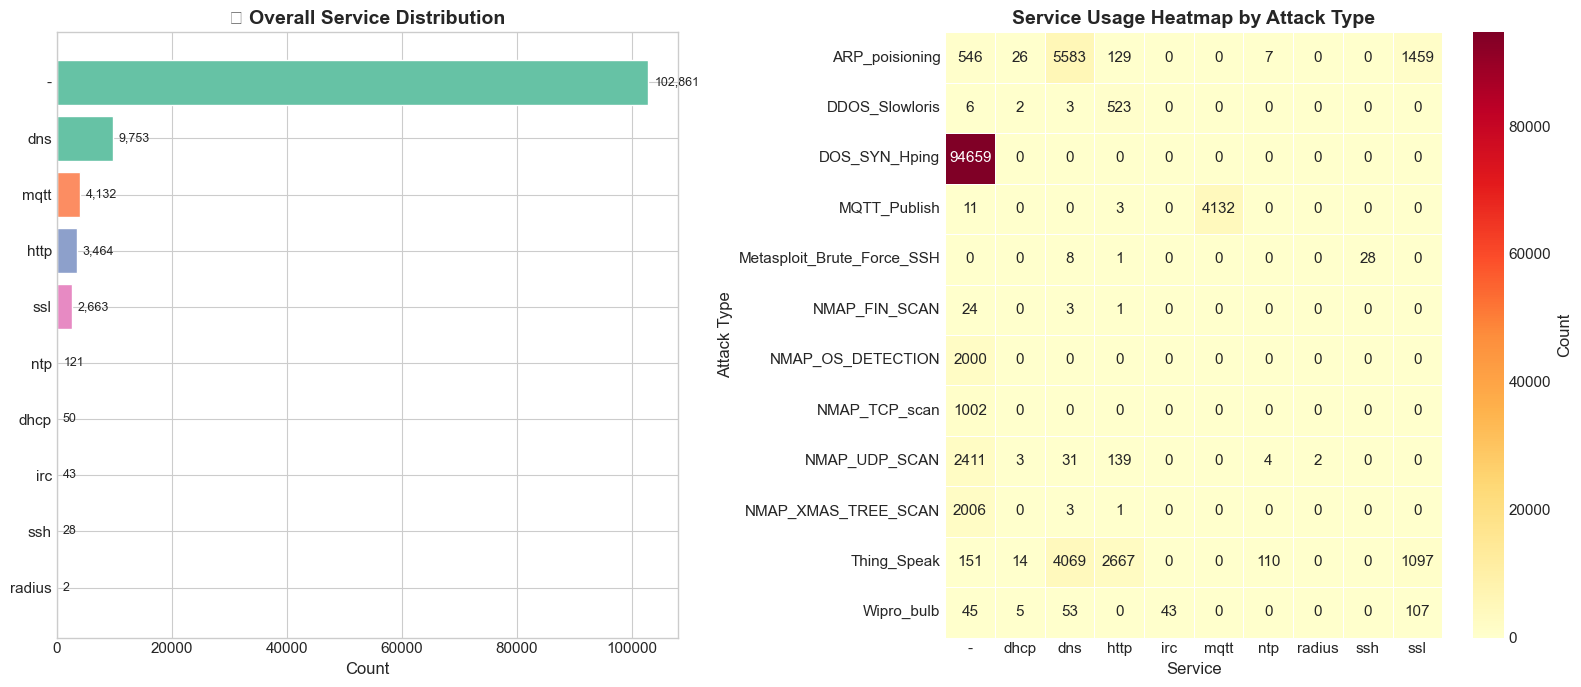

In [36]:
# Service Distribution by Attack Type
print("🔧 SERVICE ANALYSIS")
print("="*60)

# Overall service distribution
print("\nService Distribution:")
service_counts = df['service'].value_counts()
print(service_counts)

# Visualize service by attack type
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Service distribution overall
ax1 = axes[0]
service_colors = plt.cm.Set2(np.linspace(0, 1, len(service_counts)))
bars = ax1.barh(service_counts.index, service_counts.values, color=service_colors, edgecolor='white')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('🔧 Overall Service Distribution', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add value labels
for bar, count in zip(bars, service_counts.values):
    ax1.text(count + max(service_counts)*0.01, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=9)

# Service by Attack Type Heatmap
ax2 = axes[1]
service_attack = pd.crosstab(df['Attack_type'], df['service'])
sns.heatmap(service_attack, annot=True, fmt='d', cmap='YlOrRd', ax=ax2, 
            cbar_kws={'label': 'Count'}, linewidths=0.5)
ax2.set_title('Service Usage Heatmap by Attack Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Service')
ax2.set_ylabel('Attack Type')

plt.tight_layout()
plt.savefig('service_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

PROTOCOL ANALYSIS

Overall Protocol Distribution:
proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64


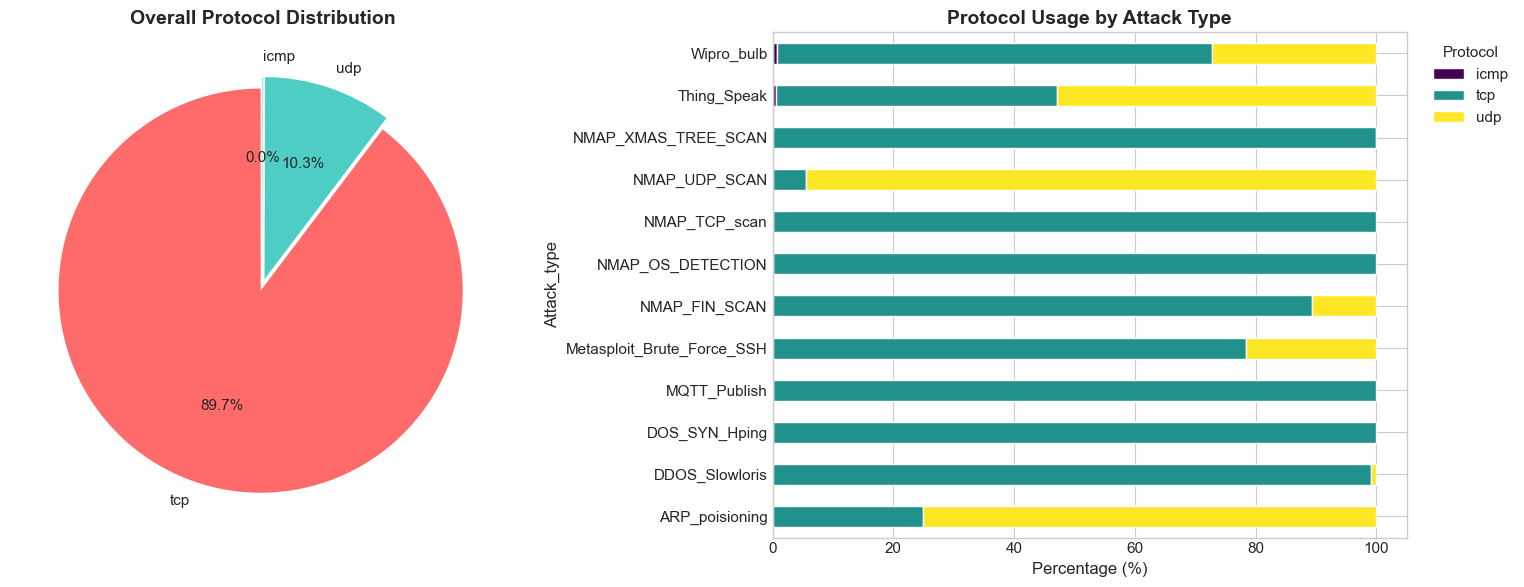

In [21]:
# Protocol Distribution by Attack Type
print("PROTOCOL ANALYSIS")
print("="*60)

# Overall protocol distribution
print("\nOverall Protocol Distribution:")
print(df['proto'].value_counts())

# Create crosstab for protocol vs attack type
proto_attack = pd.crosstab(df['Attack_type'], df['proto'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Protocol distribution overall
ax1 = axes[0]
proto_counts = df['proto'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = ax1.pie(proto_counts.values, labels=proto_counts.index, 
                                    autopct='%1.1f%%', colors=colors[:len(proto_counts)],
                                    explode=[0.03]*len(proto_counts), startangle=90)
ax1.set_title('Overall Protocol Distribution', fontsize=14, fontweight='bold')

# Protocol by Attack Type (Stacked Bar)
ax2 = axes[1]
proto_attack.plot(kind='barh', stacked=True, ax=ax2, colormap='viridis', edgecolor='white')
ax2.set_xlabel('Percentage (%)', fontsize=12)
ax2.set_title('Protocol Usage by Attack Type', fontsize=14, fontweight='bold')
ax2.legend(title='Protocol', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig('protocol_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## 6. Correlation Analysis

🔗 CORRELATION ANALYSIS


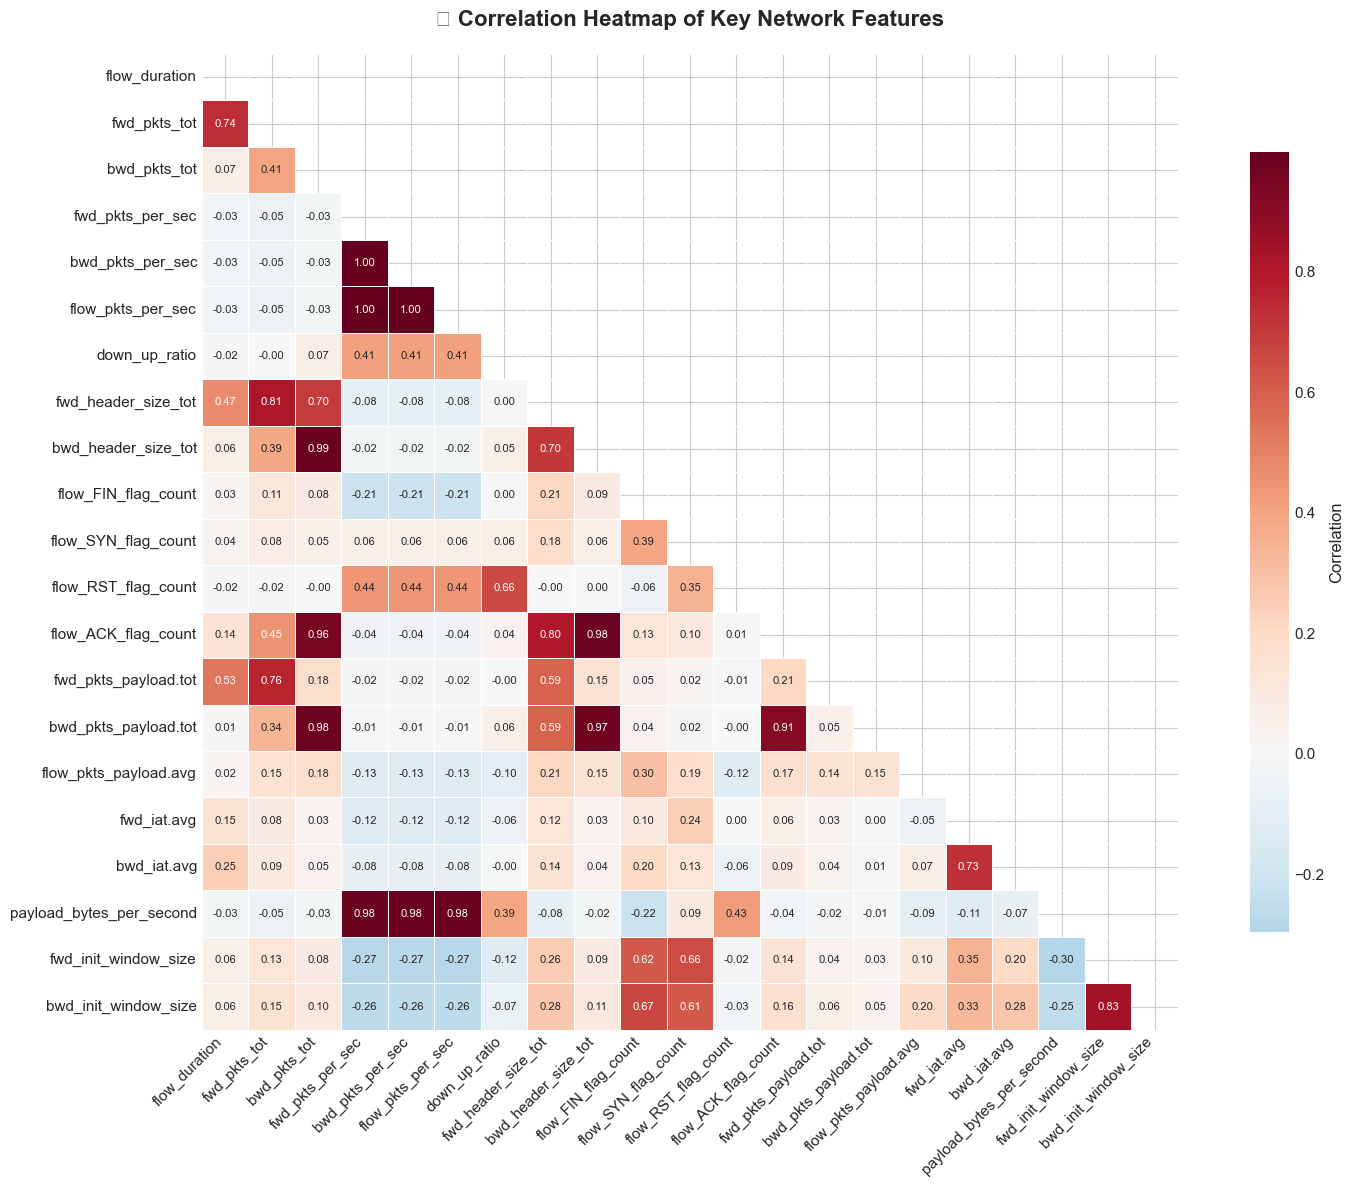

✅ Correlation heatmap saved!


In [23]:
# Correlation Matrix for Key Features
print("🔗 CORRELATION ANALYSIS")
print("="*60)

# Select key numerical features for correlation (too many features, so select important ones)
key_features = [
    'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 
    'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
    'down_up_ratio', 'fwd_header_size_tot', 'bwd_header_size_tot',
    'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
    'flow_ACK_flag_count', 'fwd_pkts_payload.tot', 'bwd_pkts_payload.tot',
    'flow_pkts_payload.avg', 'fwd_iat.avg', 'bwd_iat.avg',
    'payload_bytes_per_second', 'fwd_init_window_size', 'bwd_init_window_size'
]

# Filter to only existing columns
key_features = [f for f in key_features if f in df.columns]

# Calculate correlation matrix
corr_matrix = df[key_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, 
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            annot_kws={'size': 8})
plt.title('🔗 Correlation Heatmap of Key Network Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Correlation heatmap saved!")

HIGHLY CORRELATED FEATURES

Feature pairs with |correlation| > 0.7:
------------------------------------------------------------


,Feature 1,Feature 2,Correlation
10,bwd_pkts_per_sec,flow_pkts_per_sec,0.999997
8,fwd_pkts_per_sec,flow_pkts_per_sec,0.999997
7,fwd_pkts_per_sec,bwd_pkts_per_sec,0.999986
4,bwd_pkts_tot,bwd_header_size_tot,0.985229
11,bwd_pkts_per_sec,payload_bytes_per_second,0.984291
12,flow_pkts_per_sec,payload_bytes_per_second,0.984289
9,fwd_pkts_per_sec,payload_bytes_per_second,0.984281
15,bwd_header_size_tot,flow_ACK_flag_count,0.976784
6,bwd_pkts_tot,bwd_pkts_payload.tot,0.975332
16,bwd_header_size_tot,bwd_pkts_payload.tot,0.968662


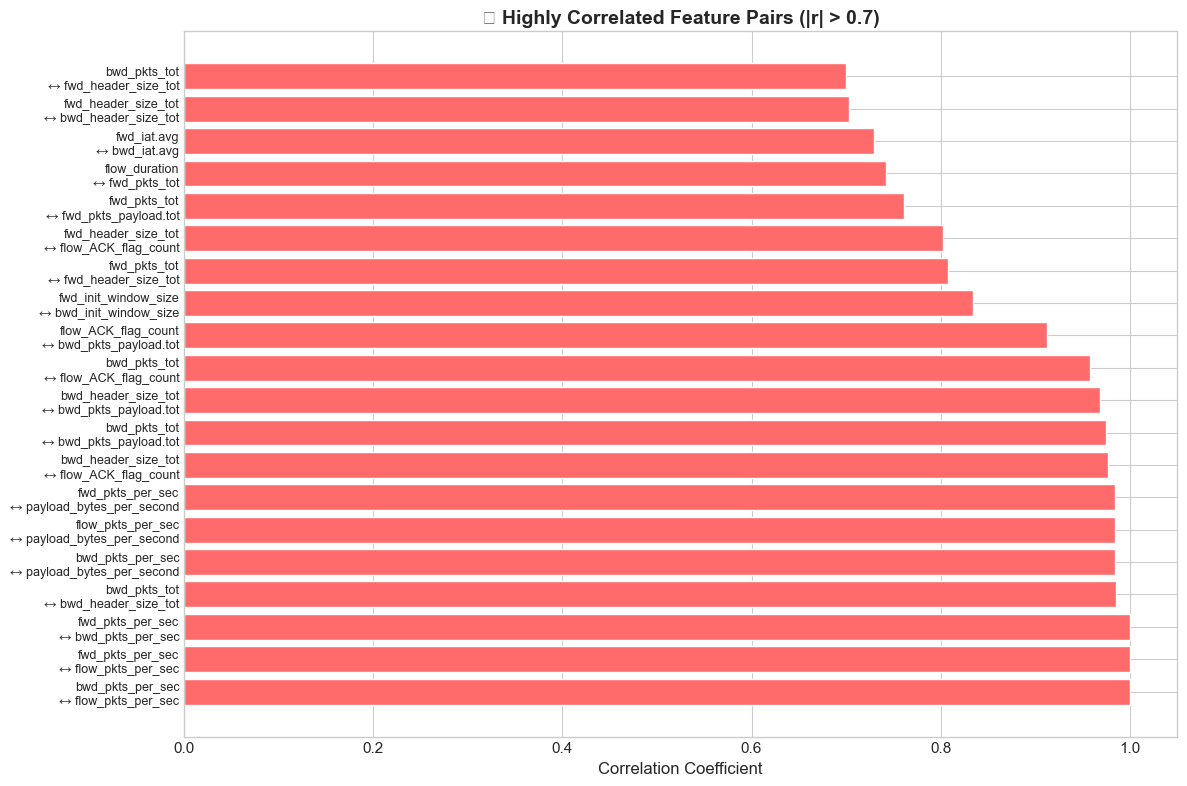

In [24]:
# Find highly correlated feature pairs
print("HIGHLY CORRELATED FEATURES")
print("="*60)

# Get correlation pairs
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)

print(f"\nFeature pairs with |correlation| > 0.7:")
print("-"*60)
if len(corr_pairs_df) > 0:
    display(corr_pairs_df.style.background_gradient(subset=['Correlation'], cmap='RdYlGn_r'))
else:
    print("No highly correlated pairs found with threshold > 0.7")
    
# Visualize top correlated pairs
if len(corr_pairs_df) > 0:
    fig, ax = plt.subplots(figsize=(12, max(4, len(corr_pairs_df)*0.4)))
    colors = ['#FF6B6B' if c > 0 else '#4ECDC4' for c in corr_pairs_df['Correlation']]
    y_labels = [f"{row['Feature 1']}\n↔ {row['Feature 2']}" for _, row in corr_pairs_df.iterrows()]
    ax.barh(range(len(corr_pairs_df)), corr_pairs_df['Correlation'], color=colors, edgecolor='white')
    ax.set_yticks(range(len(corr_pairs_df)))
    ax.set_yticklabels(y_labels, fontsize=9)
    ax.set_xlabel('Correlation Coefficient', fontsize=12)
    ax.set_title('🔗 Highly Correlated Feature Pairs (|r| > 0.7)', fontsize=14, fontweight='bold')
    ax.axvline(x=0, color='black', linewidth=0.5)
    plt.tight_layout()
    plt.show()

## 7. Feature Distributions by Attack Type

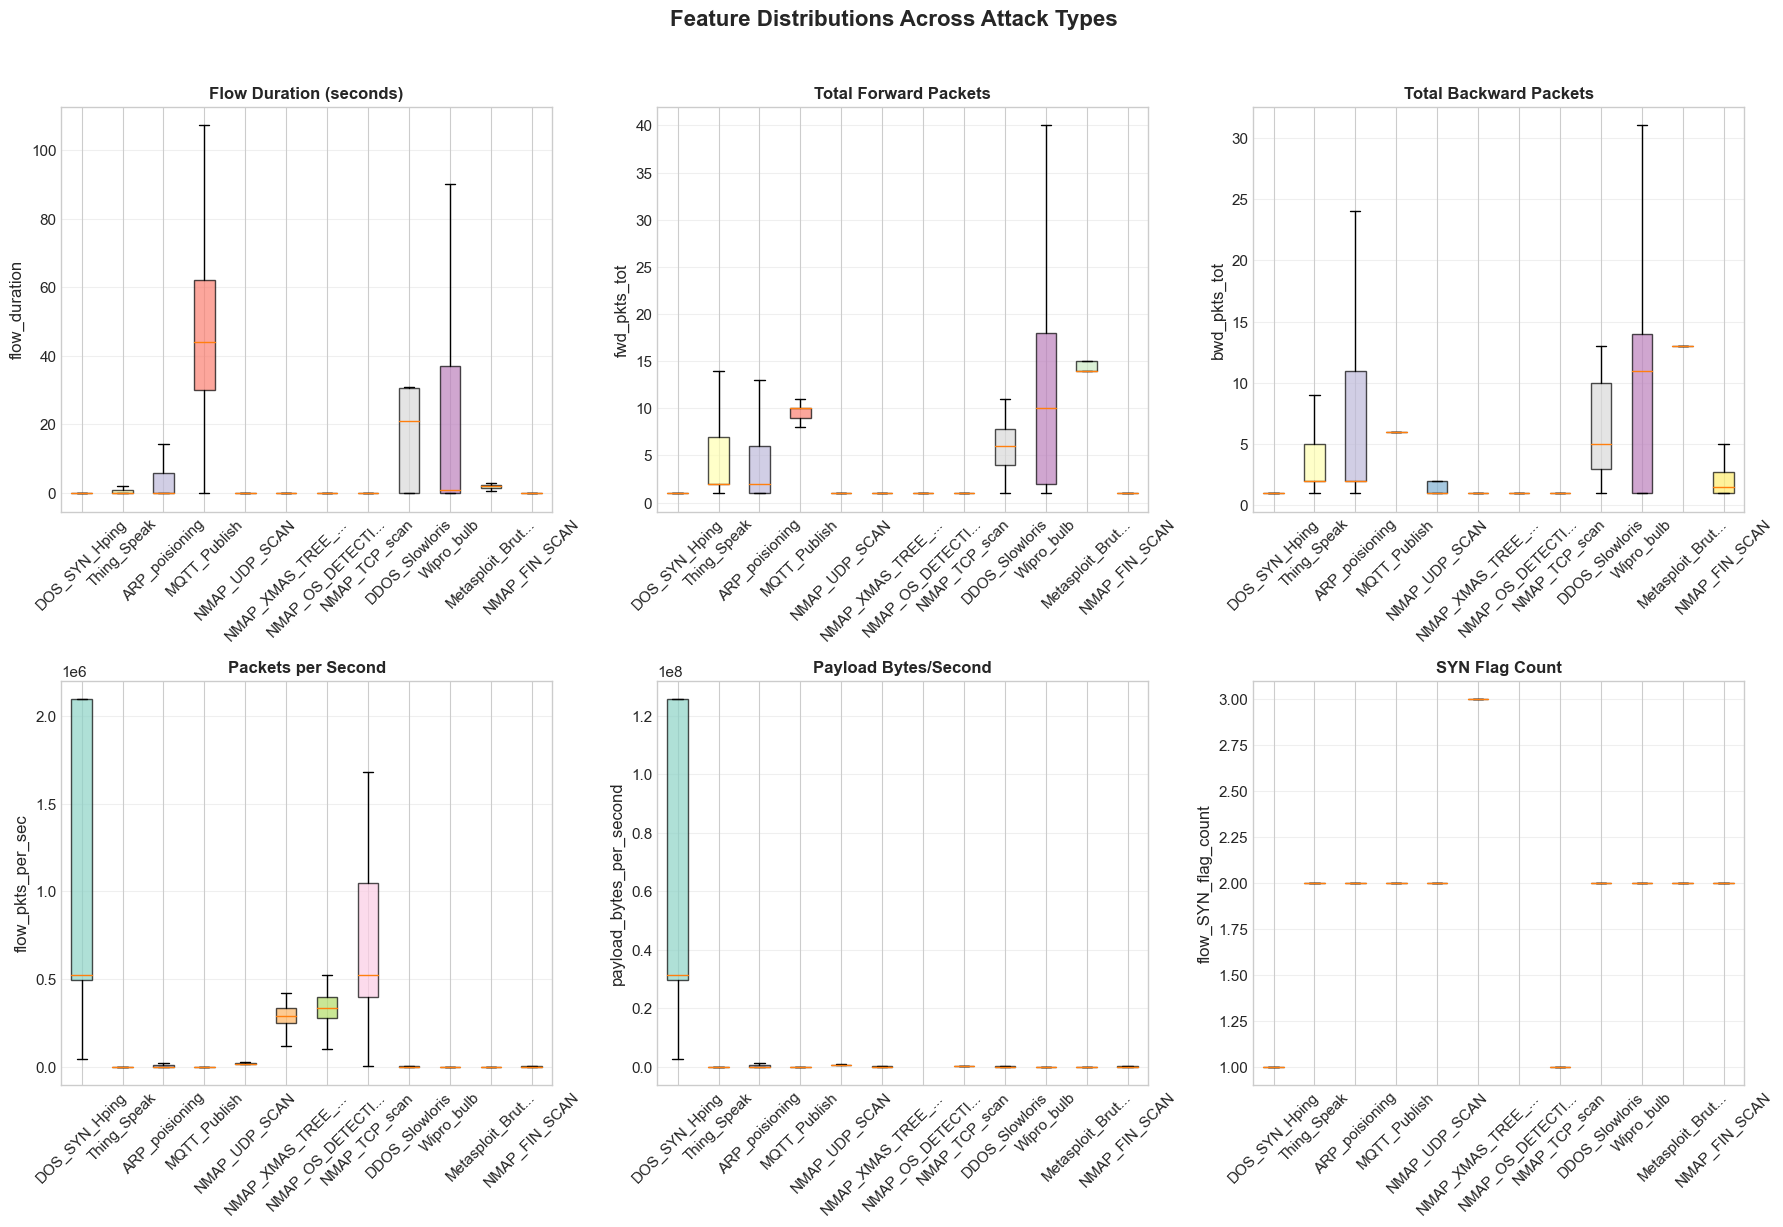

In [25]:
# Key features to analyze by attack type
analysis_features = [
    ('flow_duration', 'Flow Duration (seconds)'),
    ('fwd_pkts_tot', 'Total Forward Packets'),
    ('bwd_pkts_tot', 'Total Backward Packets'),
    ('flow_pkts_per_sec', 'Packets per Second'),
    ('payload_bytes_per_second', 'Payload Bytes/Second'),
    ('flow_SYN_flag_count', 'SYN Flag Count')
]

# Create boxplots for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (feature, title) in enumerate(analysis_features):
    ax = axes[idx]
    
    # Use log scale for better visualization of skewed data
    data_to_plot = df[df[feature] > 0].copy()  # Filter zeros for log scale
    
    # Create boxplot with custom styling
    box = ax.boxplot([data_to_plot[data_to_plot['Attack_type'] == attack][feature].values 
                      for attack in attack_counts.index],
                     labels=[a[:15] + '...' if len(a) > 15 else a for a in attack_counts.index],
                     patch_artist=True,
                     showfliers=False)  # Hide outliers for cleaner view
    
    # Color boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(attack_counts)))
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(f'{title}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel(feature)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Feature Distributions Across Attack Types', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_boxplots.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

MEAN FEATURE VALUES BY ATTACK TYPE


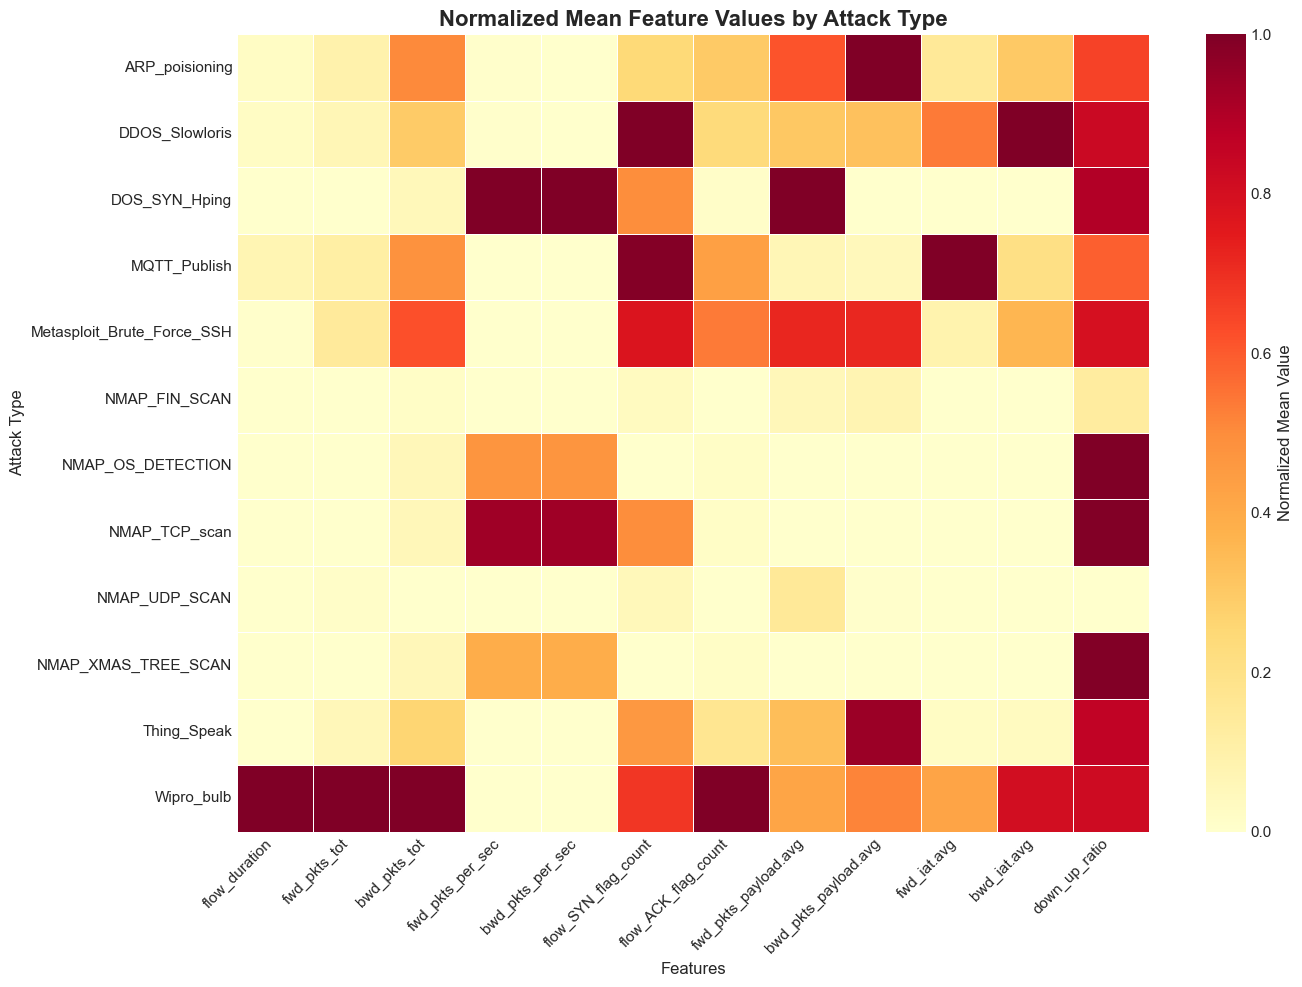


Actual Mean Values (Selected Features):


,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_SYN_flag_count,flow_ACK_flag_count,fwd_pkts_payload.avg,bwd_pkts_payload.avg,fwd_iat.avg,bwd_iat.avg,down_up_ratio
Attack_type,,,,,,,,,,,,
ARP_poisioning,15.89,8.30,8.68,1788.03,1680.86,0.49,12.04,73.91,145.02,744345.54,766425.61,0.66
DDOS_Slowloris,14.70,6.04,5.04,3344.63,181.43,2.01,9.57,36.68,47.45,2660822.69,2523957.94,0.83
DOS_SYN_Hping,0.00,1.00,0.90,444796.21,444796.21,1.00,0.90,120.00,0.00,0.00,0.00,0.90
MQTT_Publish,43.40,10.17,8.28,0.65,0.54,2.00,17.45,7.91,6.85,4941675.20,522207.23,0.59
Metasploit_Brute_Force_SSH,3.01,12.22,10.65,97.64,97.13,1.57,21.46,86.49,104.13,431322.70,910038.34,0.79
NMAP_FIN_SCAN,0.02,1.21,0.32,30.42,30.36,0.07,0.36,6.73,11.27,4114.73,6539.12,0.14
NMAP_OS_DETECTION,0.00,1.00,1.00,211007.47,211007.47,0.00,1.00,0.00,0.00,0.00,0.00,1.00
NMAP_TCP_scan,0.00,1.01,1.00,416853.08,416822.47,1.00,1.01,0.01,0.00,7.31,0.00,1.00
NMAP_UDP_SCAN,0.74,2.07,0.01,1127.90,0.82,0.11,0.32,17.97,0.64,14364.67,178.69,0.01


In [26]:
# Mean Feature Values by Attack Type - Heatmap
print("MEAN FEATURE VALUES BY ATTACK TYPE")
print("="*60)

# Select important features for comparison
important_features = [
    'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 
    'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 
    'flow_SYN_flag_count', 'flow_ACK_flag_count',
    'fwd_pkts_payload.avg', 'bwd_pkts_payload.avg',
    'fwd_iat.avg', 'bwd_iat.avg', 'down_up_ratio'
]

# Filter to existing columns
important_features = [f for f in important_features if f in df.columns]

# Calculate mean values by attack type
mean_by_attack = df.groupby('Attack_type')[important_features].mean()

# Normalize for better visualization (min-max scaling per feature)
mean_normalized = (mean_by_attack - mean_by_attack.min()) / (mean_by_attack.max() - mean_by_attack.min())

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(mean_normalized, annot=False, cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Normalized Mean Value'})
plt.title('Normalized Mean Feature Values by Attack Type', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mean_features_heatmap.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Show actual mean values table
print("\nActual Mean Values (Selected Features):")
mean_by_attack.round(2)

## 8.TCP Flag Analysis by Attack Type

TCP FLAG ANALYSIS BY ATTACK TYPE


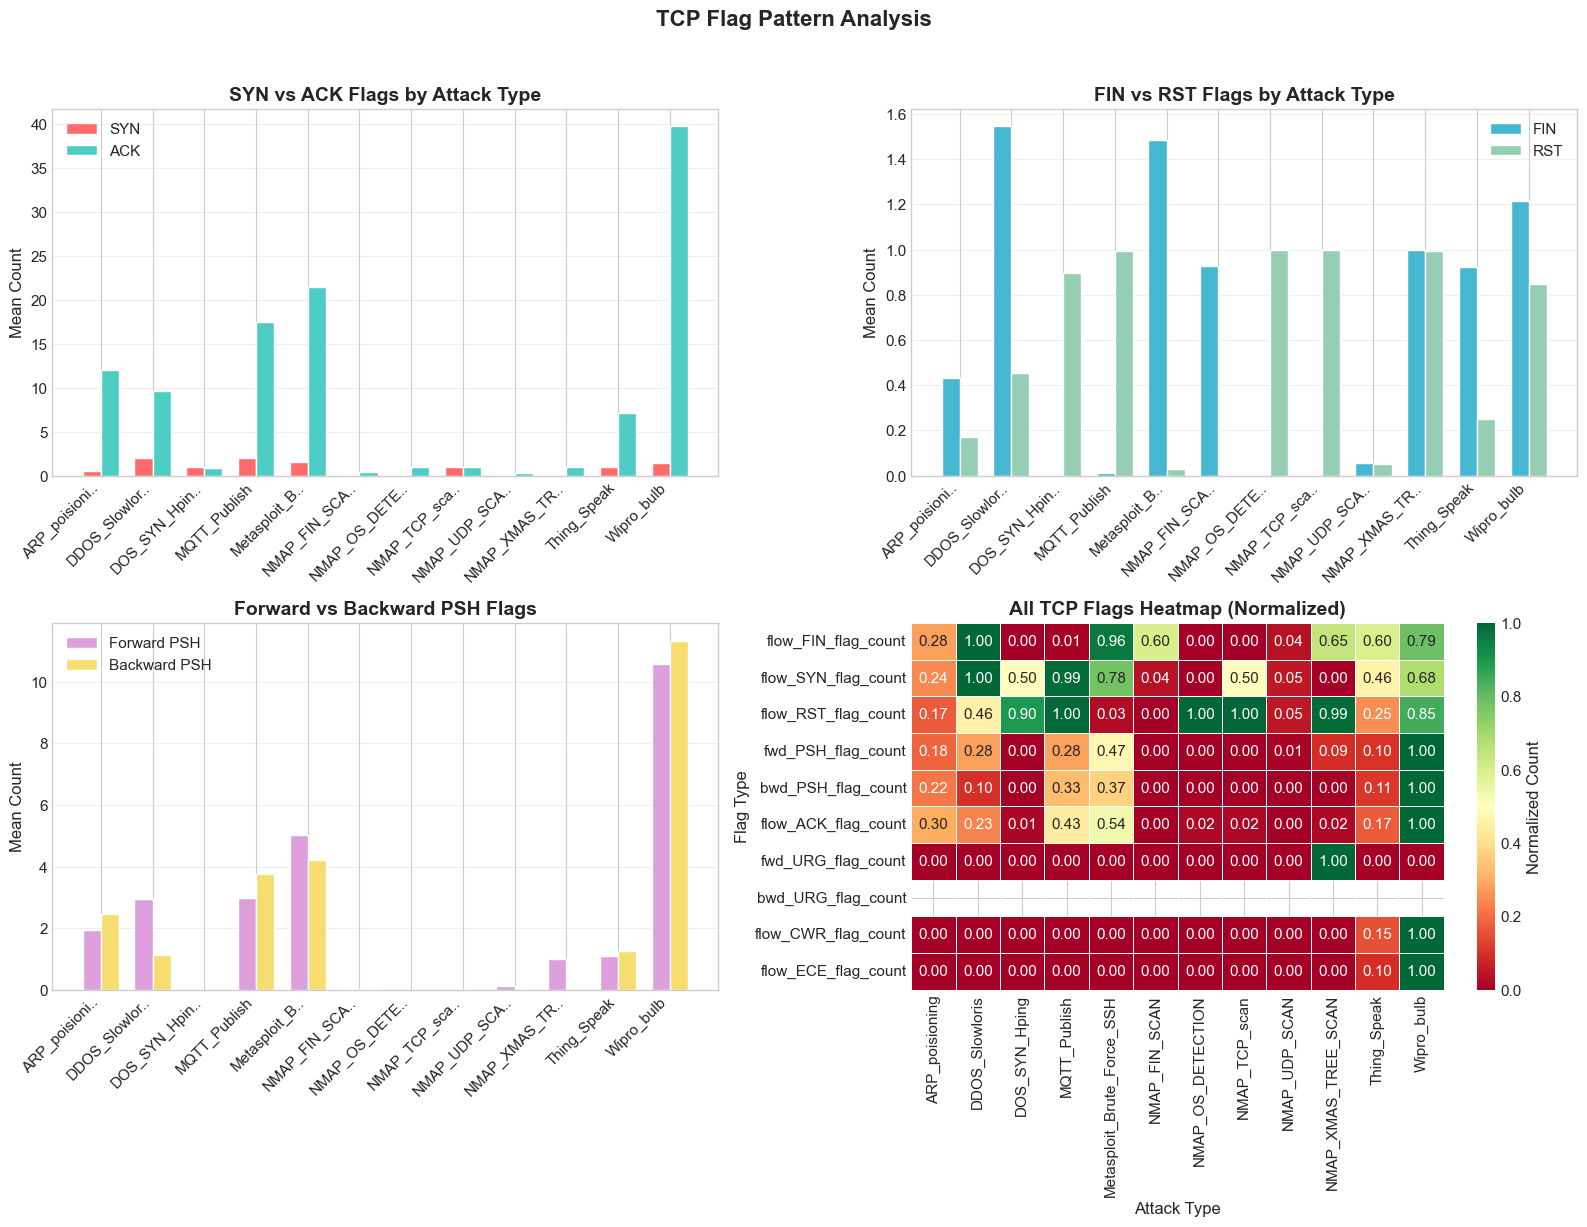


Mean TCP Flag Counts by Attack Type:


,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count
Attack_type,,,,,,,,,,
ARP_poisioning,0.43,0.49,0.17,1.95,2.47,12.04,0.0,0.0,0.00,0.00
DDOS_Slowloris,1.54,2.01,0.46,2.95,1.13,9.57,0.0,0.0,0.00,0.00
DOS_SYN_Hping,0.00,1.00,0.90,0.00,0.00,0.90,0.0,0.0,0.00,0.00
MQTT_Publish,0.01,2.00,1.00,2.99,3.75,17.45,0.0,0.0,0.00,0.00
Metasploit_Brute_Force_SSH,1.49,1.57,0.03,5.03,4.22,21.46,0.0,0.0,0.00,0.00
NMAP_FIN_SCAN,0.93,0.07,0.00,0.04,0.04,0.36,0.0,0.0,0.00,0.00
NMAP_OS_DETECTION,0.00,0.00,1.00,0.00,0.00,1.00,0.0,0.0,0.00,0.00
NMAP_TCP_scan,0.00,1.00,1.00,0.00,0.00,1.01,0.0,0.0,0.00,0.00
NMAP_UDP_SCAN,0.05,0.11,0.05,0.11,0.00,0.32,0.0,0.0,0.00,0.00


In [27]:
# TCP Flags Analysis - Key indicators for attack patterns
print("TCP FLAG ANALYSIS BY ATTACK TYPE")
print("="*60)

flag_columns = [
    'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
    'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
    'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count'
]

# Filter existing columns
flag_columns = [f for f in flag_columns if f in df.columns]

# Mean flag counts by attack type
flag_means = df.groupby('Attack_type')[flag_columns].mean()

# Create subplot for flags
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: SYN vs ACK flags
ax1 = axes[0, 0]
x = np.arange(len(flag_means.index))
width = 0.35
ax1.bar(x - width/2, flag_means['flow_SYN_flag_count'], width, label='SYN', color='#FF6B6B', edgecolor='white')
ax1.bar(x + width/2, flag_means['flow_ACK_flag_count'], width, label='ACK', color='#4ECDC4', edgecolor='white')
ax1.set_xticks(x)
ax1.set_xticklabels([a[:12] + '..' if len(a) > 12 else a for a in flag_means.index], rotation=45, ha='right')
ax1.set_ylabel('Mean Count')
ax1.set_title('SYN vs ACK Flags by Attack Type', fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: FIN vs RST flags
ax2 = axes[0, 1]
ax2.bar(x - width/2, flag_means['flow_FIN_flag_count'], width, label='FIN', color='#45B7D1', edgecolor='white')
ax2.bar(x + width/2, flag_means['flow_RST_flag_count'], width, label='RST', color='#96CEB4', edgecolor='white')
ax2.set_xticks(x)
ax2.set_xticklabels([a[:12] + '..' if len(a) > 12 else a for a in flag_means.index], rotation=45, ha='right')
ax2.set_ylabel('Mean Count')
ax2.set_title('FIN vs RST Flags by Attack Type', fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: PSH flags (Forward vs Backward)
ax3 = axes[1, 0]
ax3.bar(x - width/2, flag_means['fwd_PSH_flag_count'], width, label='Forward PSH', color='#DDA0DD', edgecolor='white')
ax3.bar(x + width/2, flag_means['bwd_PSH_flag_count'], width, label='Backward PSH', color='#F7DC6F', edgecolor='white')
ax3.set_xticks(x)
ax3.set_xticklabels([a[:12] + '..' if len(a) > 12 else a for a in flag_means.index], rotation=45, ha='right')
ax3.set_ylabel('Mean Count')
ax3.set_title('Forward vs Backward PSH Flags', fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Heatmap of all flags
ax4 = axes[1, 1]
# Normalize for heatmap
flag_normalized = (flag_means - flag_means.min()) / (flag_means.max() - flag_means.min())
sns.heatmap(flag_normalized.T, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax4,
            cbar_kws={'label': 'Normalized Count'}, linewidths=0.5)
ax4.set_title('All TCP Flags Heatmap (Normalized)', fontweight='bold')
ax4.set_xlabel('Attack Type')
ax4.set_ylabel('Flag Type')

plt.suptitle('TCP Flag Pattern Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('tcp_flags_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nMean TCP Flag Counts by Attack Type:")
flag_means.round(2)

## 9. Port Analysis by Attack Type

PORT ANALYSIS


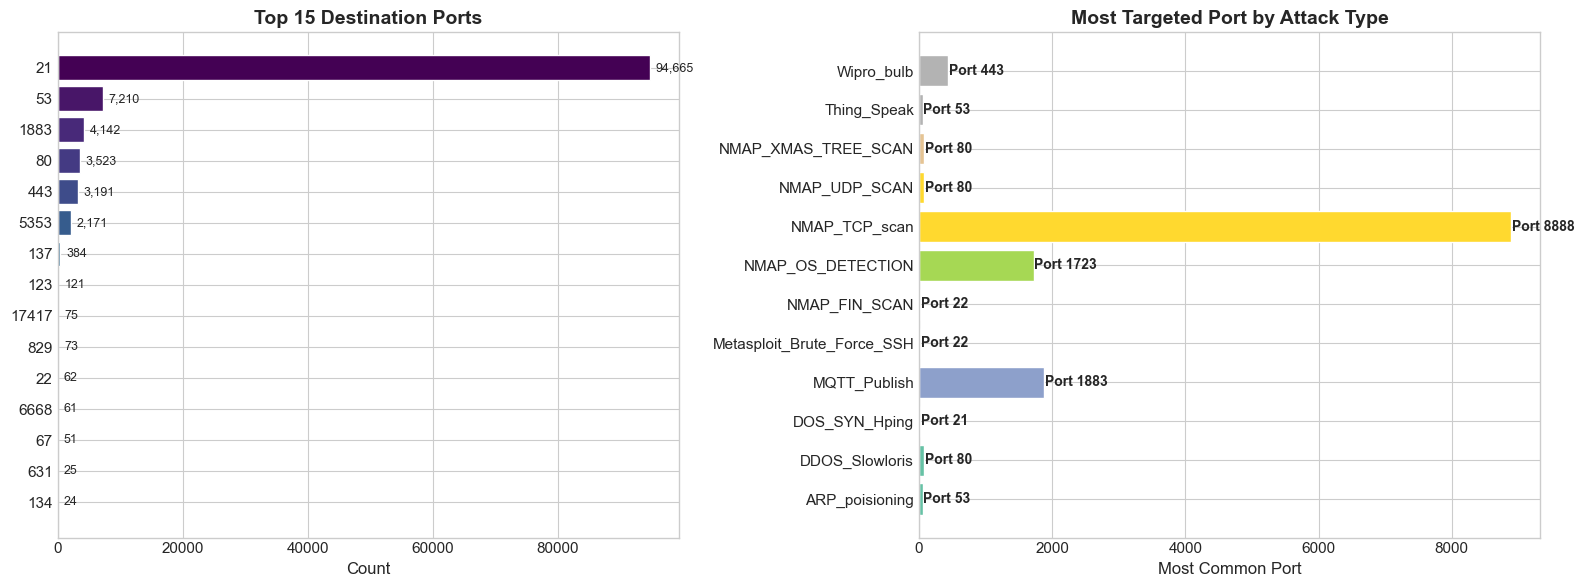


Most Common Destination Port per Attack Type:
--------------------------------------------------
ARP_poisioning                 Port 53     (40.9%)
DDOS_Slowloris                 Port 80     (99.1%)
DOS_SYN_Hping                  Port 21     (100.0%)
MQTT_Publish                   Port 1883   (99.9%)
Metasploit_Brute_Force_SSH     Port 22     (75.7%)
NMAP_FIN_SCAN                  Port 22     (85.7%)
NMAP_OS_DETECTION              Port 1723   (0.1%)
NMAP_TCP_scan                  Port 8888   (0.3%)
NMAP_UDP_SCAN                  Port 80     (5.6%)
NMAP_XMAS_TREE_SCAN            Port 80     (0.2%)
Thing_Speak                    Port 53     (48.9%)
Wipro_bulb                     Port 443    (42.3%)


In [28]:
# Port Analysis
print("PORT ANALYSIS")
print("="*60)

# Response port distribution by attack type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Most common destination ports
ax1 = axes[0]
top_ports = df['id.resp_p'].value_counts().head(15)
colors = plt.cm.viridis(np.linspace(0, 0.8, len(top_ports)))
bars = ax1.barh(range(len(top_ports)), top_ports.values, color=colors, edgecolor='white')
ax1.set_yticks(range(len(top_ports)))
ax1.set_yticklabels(top_ports.index)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('Top 15 Destination Ports', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add value labels
for bar, count in zip(bars, top_ports.values):
    ax1.text(count + max(top_ports)*0.01, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=9)

# Port distribution by attack type
ax2 = axes[1]
port_attack_counts = df.groupby(['Attack_type', 'id.resp_p']).size().unstack(fill_value=0)
# Get top 5 ports per attack type
top_ports_per_attack = {}
for attack in port_attack_counts.index:
    top_ports_per_attack[attack] = port_attack_counts.loc[attack].nlargest(3).index.tolist()

# Most common port per attack type
most_common_port = df.groupby('Attack_type')['id.resp_p'].agg(lambda x: x.value_counts().index[0])
ax2.barh(most_common_port.index, most_common_port.values, color=plt.cm.Set2(np.linspace(0, 1, len(most_common_port))), edgecolor='white')
ax2.set_xlabel('Most Common Port', fontsize=12)
ax2.set_title('Most Targeted Port by Attack Type', fontsize=14, fontweight='bold')

# Add port number labels
for i, (attack, port) in enumerate(zip(most_common_port.index, most_common_port.values)):
    ax2.text(port + 10, i, f'Port {port}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('port_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary
print("\nMost Common Destination Port per Attack Type:")
print("-"*50)
for attack, port in most_common_port.items():
    count = len(df[(df['Attack_type'] == attack) & (df['id.resp_p'] == port)])
    pct = count / len(df[df['Attack_type'] == attack]) * 100
    print(f"{attack:<30} Port {port:<6} ({pct:.1f}%)")

## 10. Flow & Packet Characteristics Violin Plots

VIOLIN PLOTS - Flow Characteristics by Attack Type


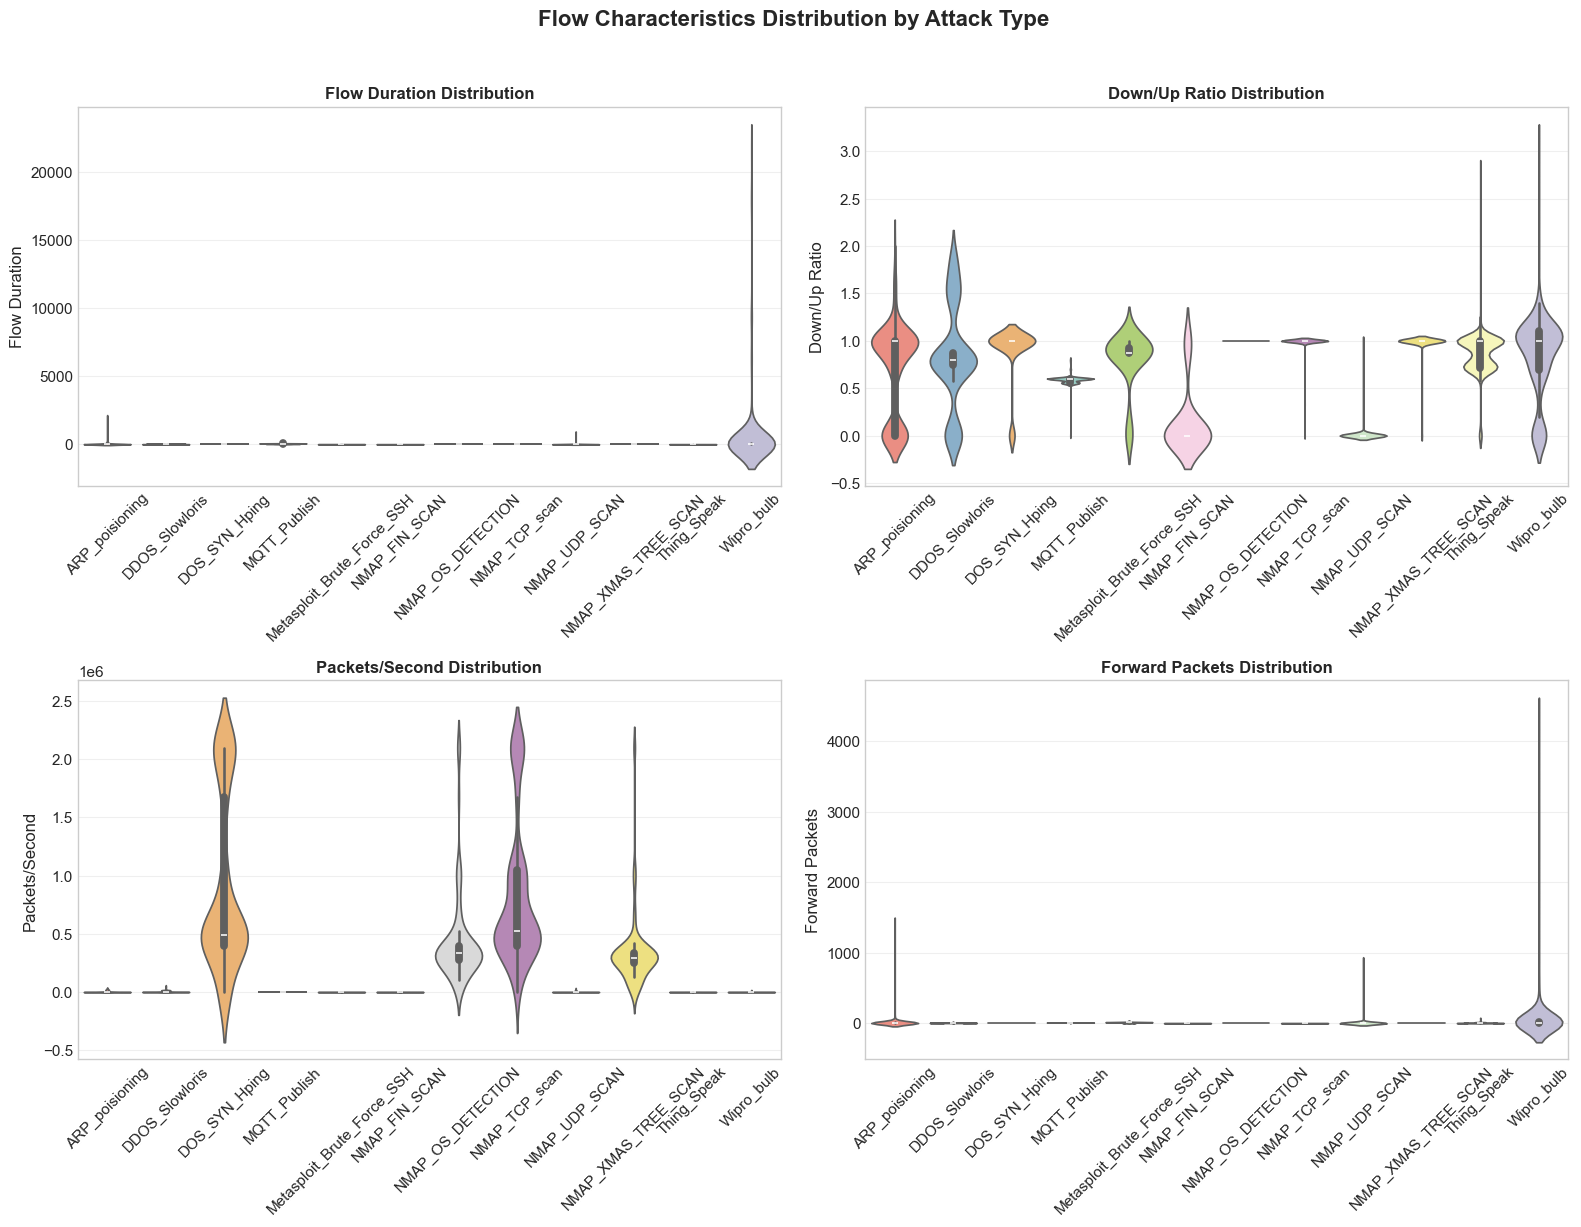

In [29]:
# Violin plots for key flow characteristics
print("VIOLIN PLOTS - Flow Characteristics by Attack Type")
print("="*60)

# Select features for violin plots
violin_features = [
    ('flow_duration', 'Flow Duration'),
    ('down_up_ratio', 'Down/Up Ratio'),
    ('flow_pkts_per_sec', 'Packets/Second'),
    ('fwd_pkts_tot', 'Forward Packets')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (feature, title) in enumerate(violin_features):
    ax = axes[idx]
    
    # Sample data for performance (violin plots can be slow with large data)
    sample_df = df.groupby('Attack_type').apply(
        lambda x: x.sample(min(500, len(x)), random_state=42)
    ).reset_index(drop=True)
    
    # Create violin plot
    palette = dict(zip(df['Attack_type'].unique(), 
                       plt.cm.Set3(np.linspace(0, 1, df['Attack_type'].nunique()))))
    
    sns.violinplot(data=sample_df, x='Attack_type', y=feature, ax=ax, 
                   palette=palette, inner='box', scale='width')
    
    ax.set_title(f'{title} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Flow Characteristics Distribution by Attack Type', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('violin_plots.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## 11. Attack Category Grouping & Pattern Analysis

ATTACK CATEGORY GROUPING

Attack Category Distribution:
----------------------------------------
DOS/DDOS                         95,193 (77.32%)
IoT Device Traffic               12,507 (10.16%)
Network Attacks                   7,787 (6.32%)
Reconnaissance/Scanning           7,630 (6.20%)


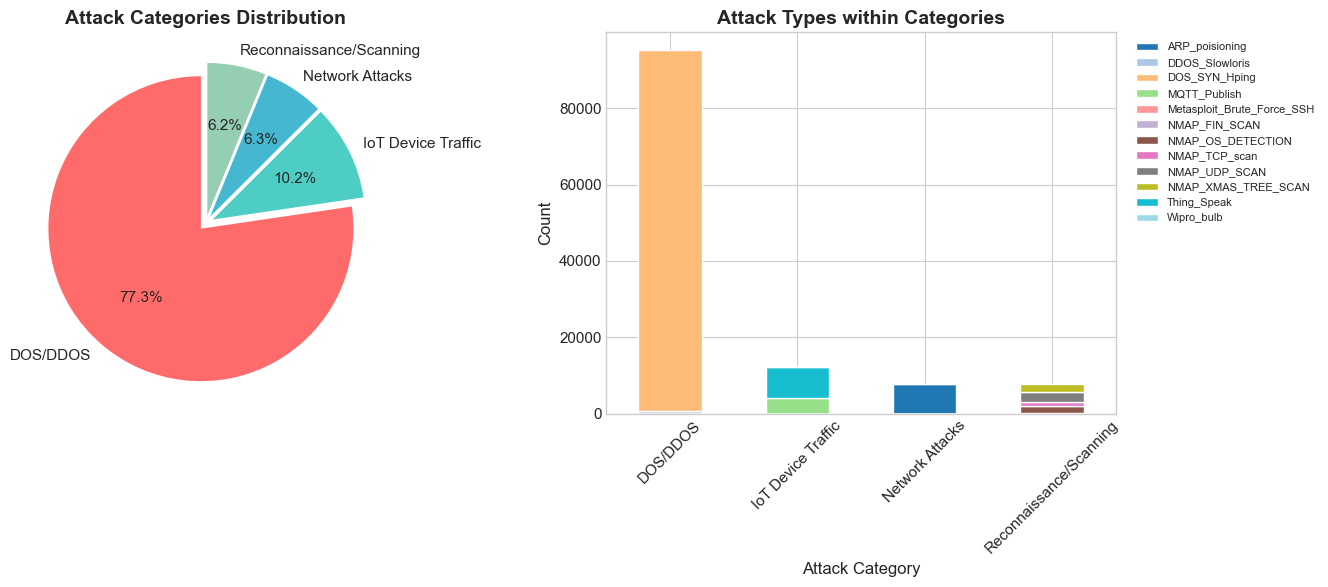

In [30]:
# Group attacks into categories for higher-level pattern analysis
print("ATTACK CATEGORY GROUPING")
print("="*60)

# Define attack categories
attack_categories = {
    'DOS/DDOS': ['DOS_SYN_Hping', 'DDOS_Slowloris'],
    'Reconnaissance/Scanning': ['NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN', 'NMAP_OS_DETECTION', 
                                 'NMAP_TCP_scan', 'NMAP_FIN_SCAN'],
    'IoT Device Traffic': ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb'],
    'Network Attacks': ['ARP_poisioning', 'Metasploit_Brute_Force_SSH']
}

# Create category column
def get_category(attack_type):
    for category, attacks in attack_categories.items():
        if attack_type in attacks:
            return category
    return 'Other'

df['Attack_Category'] = df['Attack_type'].apply(get_category)

# Category distribution
category_counts = df['Attack_Category'].value_counts()
print("\nAttack Category Distribution:")
print("-"*40)
for cat, count in category_counts.items():
    pct = count / len(df) * 100
    print(f"{cat:<30} {count:>8,} ({pct:.2f}%)")

# Visualize categories
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for categories
ax1 = axes[0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges, texts, autotexts = ax1.pie(category_counts.values, labels=category_counts.index,
                                    autopct='%1.1f%%', colors=colors[:len(category_counts)],
                                    explode=[0.05]*len(category_counts), startangle=90)
ax1.set_title('Attack Categories Distribution', fontsize=14, fontweight='bold')

# Bar chart showing attacks within each category
ax2 = axes[1]
category_attack_counts = df.groupby(['Attack_Category', 'Attack_type']).size().unstack(fill_value=0)
category_attack_counts.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20', edgecolor='white')
ax2.set_xlabel('Attack Category', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Attack Types within Categories', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig('attack_categories.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

RADAR CHART - Attack Category Feature Patterns


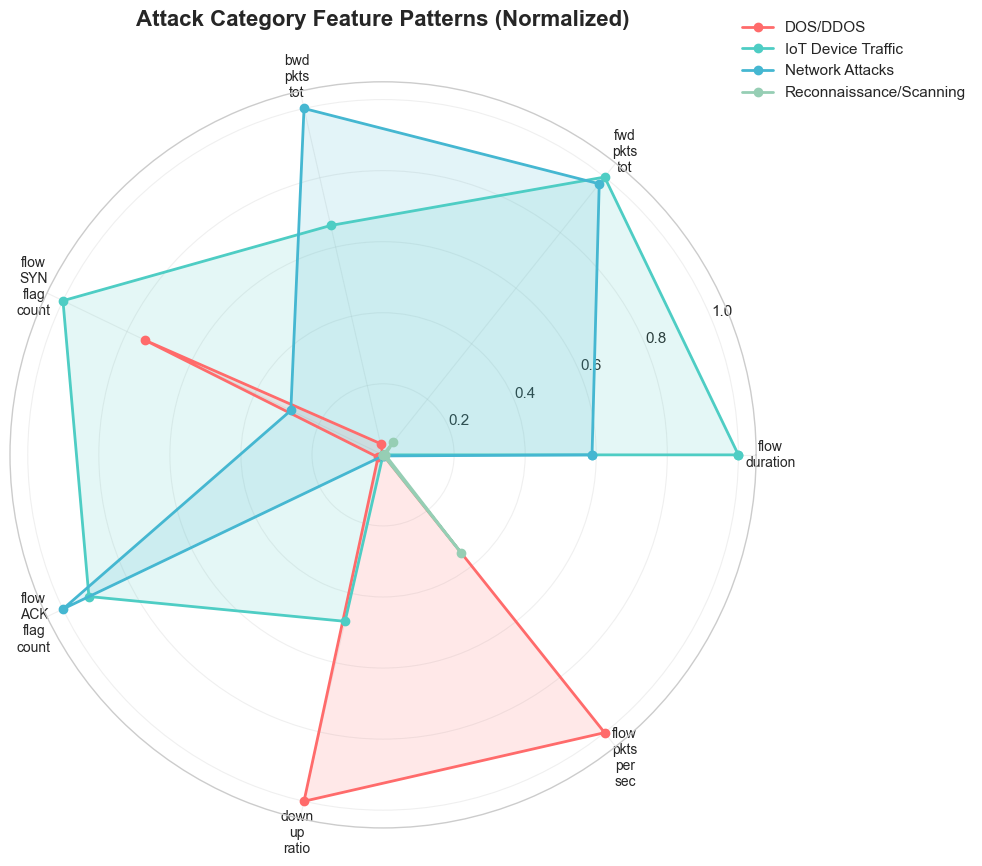


Category-wise Mean Values (Normalized):


,flow_duration,fwd_pkts_tot,bwd_pkts_tot,flow_SYN_flag_count,flow_ACK_flag_count,down_up_ratio,flow_pkts_per_sec
Attack_Category,,,,,,,
DOS/DDOS,0.000,0.000,0.032,0.743,0.016,1.000,1.000
IoT Device Traffic,1.000,1.000,0.662,1.000,0.919,0.481,0.000
Network Attacks,0.588,0.976,1.000,0.288,1.000,0.003,0.004
Reconnaissance/Scanning,0.006,0.045,0.000,0.000,0.000,0.000,0.353


In [31]:
# Radar Chart - Attack Category Patterns
print("RADAR CHART - Attack Category Feature Patterns")
print("="*60)

# Select features for radar chart
radar_features = [
    'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
    'flow_SYN_flag_count', 'flow_ACK_flag_count', 
    'down_up_ratio', 'flow_pkts_per_sec'
]

# Filter to existing columns
radar_features = [f for f in radar_features if f in df.columns]

# Calculate mean values by category and normalize
category_means = df.groupby('Attack_Category')[radar_features].mean()
category_normalized = (category_means - category_means.min()) / (category_means.max() - category_means.min())

# Create radar chart
categories_list = category_normalized.index.tolist()
num_features = len(radar_features)

# Compute angle for each feature
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for idx, category in enumerate(categories_list):
    values = category_normalized.loc[category].tolist()
    values += values[:1]  # Complete the loop
    
    ax.plot(angles, values, 'o-', linewidth=2, label=category, color=colors_radar[idx % len(colors_radar)])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx % len(colors_radar)])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f.replace('_', '\n') for f in radar_features], size=10)
ax.set_title('Attack Category Feature Patterns (Normalized)', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('radar_chart.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nCategory-wise Mean Values (Normalized):")
category_normalized.round(3)

## 12. Feature Distribution Histograms

FEATURE DISTRIBUTION ANALYSIS


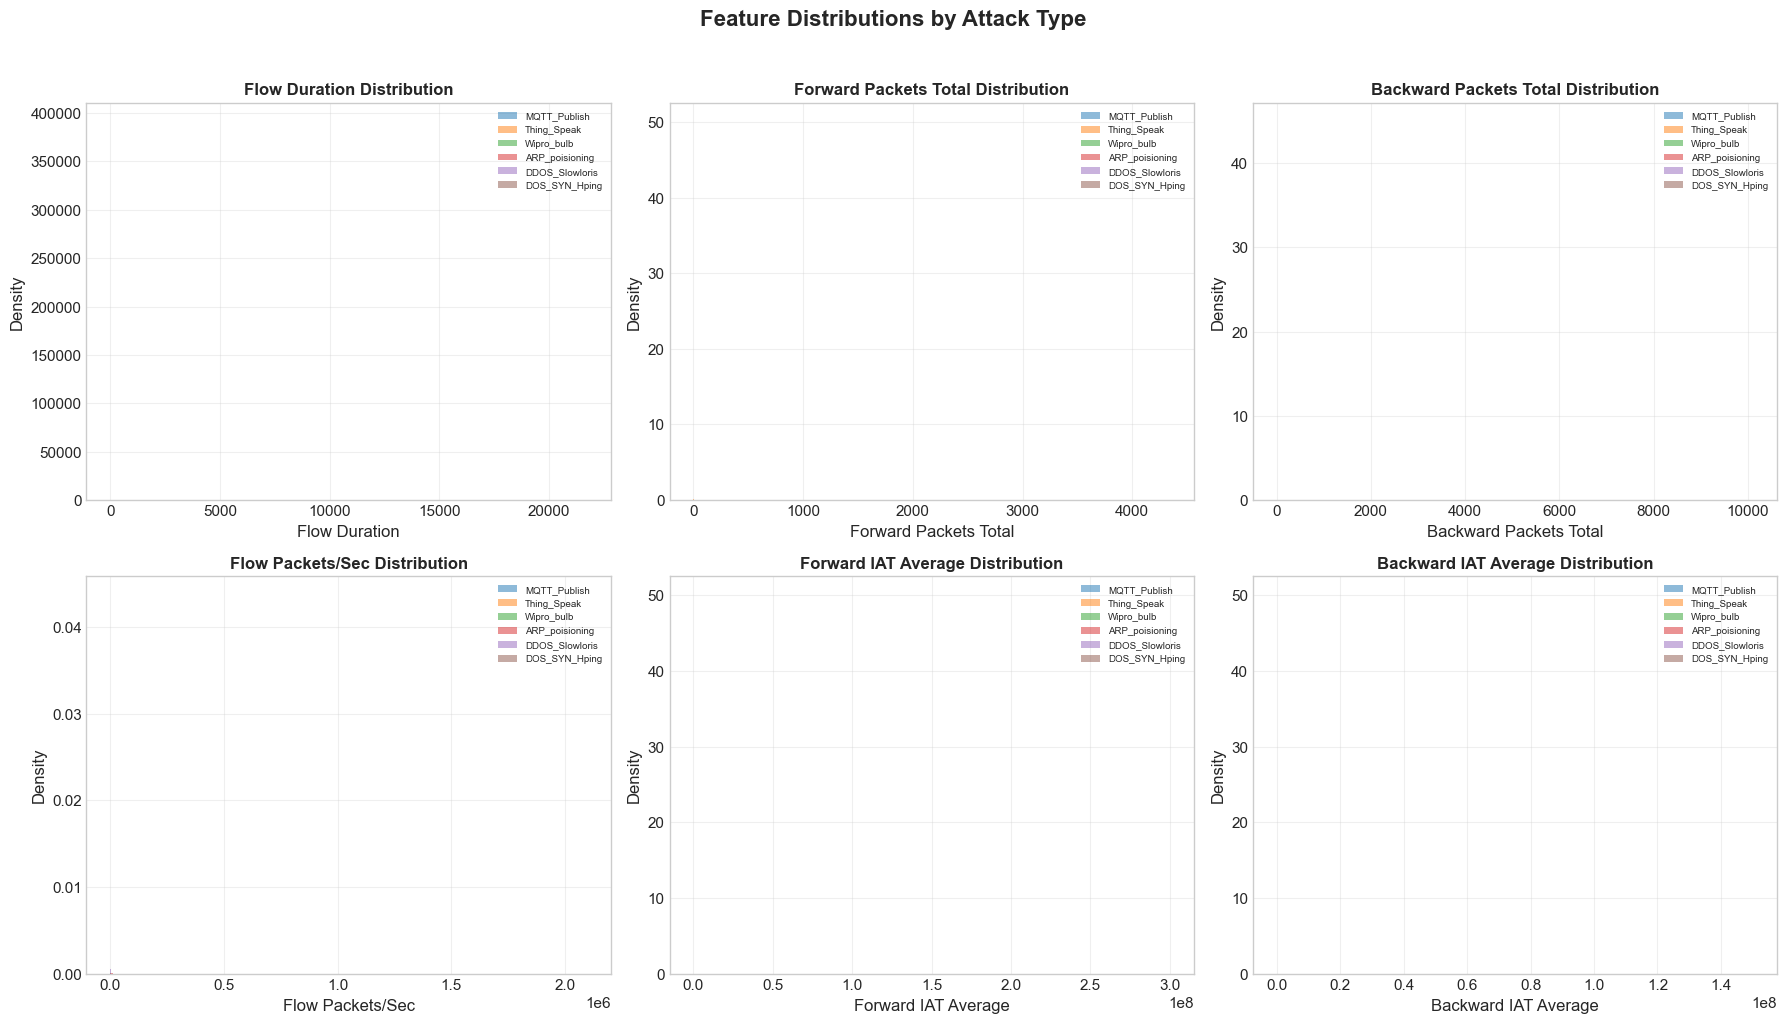

In [32]:
# Distribution Histograms for Key Features
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*60)

# Select features for histogram analysis
hist_features = [
    ('flow_duration', 'Flow Duration'),
    ('fwd_pkts_tot', 'Forward Packets Total'),
    ('bwd_pkts_tot', 'Backward Packets Total'),
    ('flow_pkts_per_sec', 'Flow Packets/Sec'),
    ('fwd_iat.avg', 'Forward IAT Average'),
    ('bwd_iat.avg', 'Backward IAT Average')
]

# Filter existing
hist_features = [(f, t) for f, t in hist_features if f in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (feature, title) in enumerate(hist_features):
    ax = axes[idx]
    
    # Plot histogram for each attack type
    for attack in df['Attack_type'].unique()[:6]:  # Limit to top 6 for clarity
        data = df[df['Attack_type'] == attack][feature]
        if len(data) > 0:
            ax.hist(data, bins=50, alpha=0.5, label=attack[:15], density=True)
    
    ax.set_xlabel(title)
    ax.set_ylabel('Density')
    ax.set_title(f'{title} Distribution', fontsize=12, fontweight='bold')
    ax.legend(fontsize=7, loc='upper right')
    ax.grid(alpha=0.3)

plt.suptitle('Feature Distributions by Attack Type', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## 13. PCA Visualization - Dimensionality Reduction

PCA VISUALIZATION
Explained Variance Ratio:
   PC1: 25.81%
   PC2: 13.44%
   Total: 39.26%


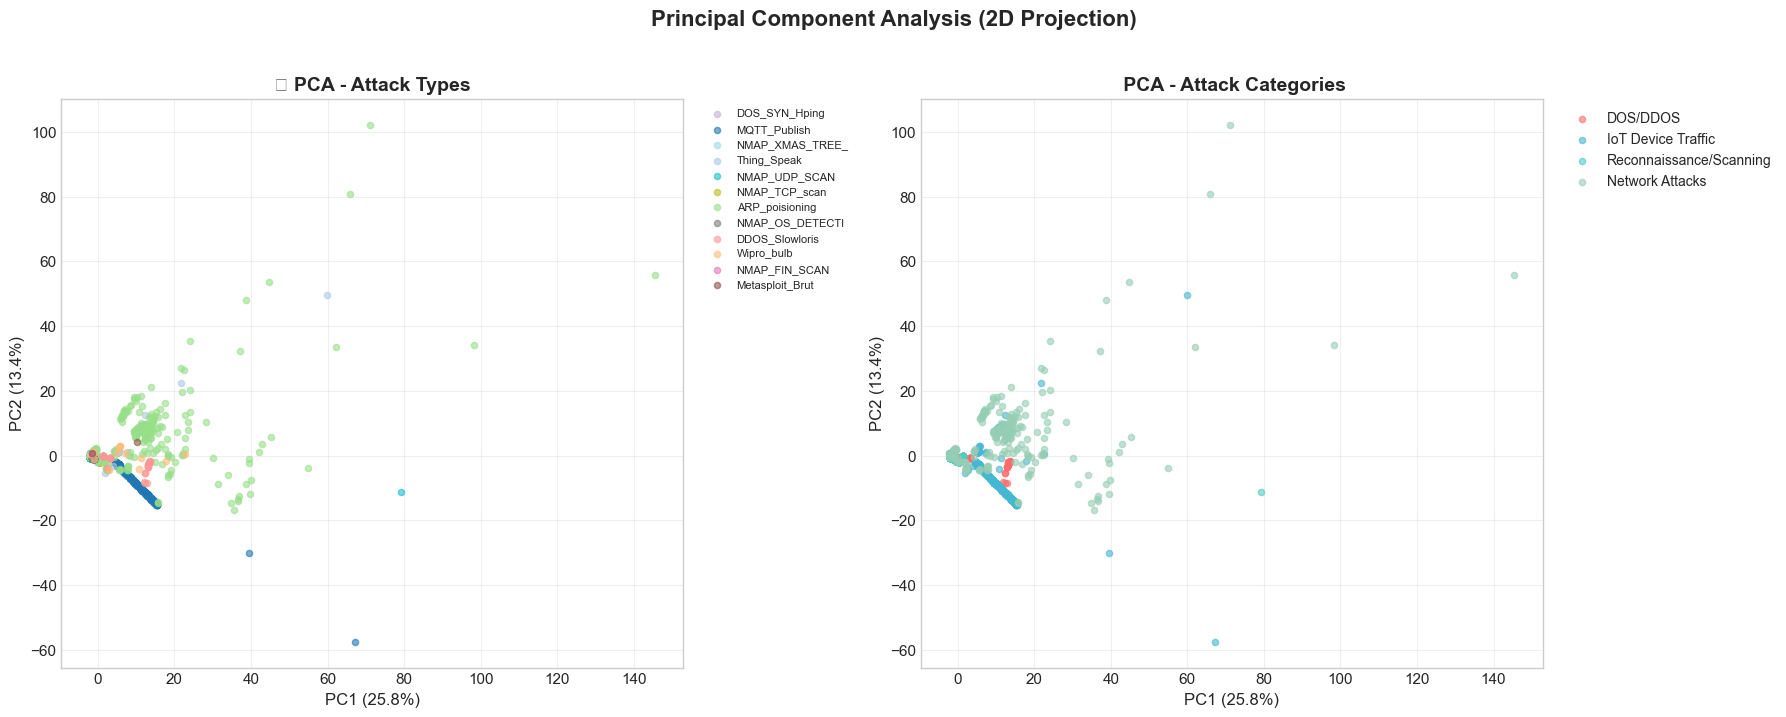

In [33]:
# PCA Visualization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("PCA VISUALIZATION")
print("="*60)

# Sample data for PCA (full data can be slow)
np.random.seed(42)
sample_size = min(10000, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
df_sample = df.iloc[sample_indices].copy()

# Select numerical features for PCA
pca_features = df_sample.select_dtypes(include=[np.number]).columns.tolist()
pca_features = [f for f in pca_features if f != 'index']

# Prepare data
X = df_sample[pca_features].fillna(0)
X = X.replace([np.inf, -np.inf], 0)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio:")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"   Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# By Attack Type
ax1 = axes[0]
colors_dict = dict(zip(df['Attack_type'].unique(), 
                       plt.cm.tab20(np.linspace(0, 1, df['Attack_type'].nunique()))))
for attack in df_sample['Attack_type'].unique():
    mask = df_sample['Attack_type'] == attack
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=[colors_dict[attack]], label=attack[:15], alpha=0.6, s=20)

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax1.set_title('🔬 PCA - Attack Types', fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
ax1.grid(alpha=0.3)

# By Attack Category
ax2 = axes[1]
category_colors = {'DOS/DDOS': '#FF6B6B', 'Reconnaissance/Scanning': '#4ECDC4',
                   'IoT Device Traffic': '#45B7D1', 'Network Attacks': '#96CEB4'}
for category in df_sample['Attack_Category'].unique():
    mask = df_sample['Attack_Category'] == category
    color = category_colors.get(category, '#FFEAA7')
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=[color], label=category, alpha=0.6, s=20)

ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax2.set_title(' PCA - Attack Categories', fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
ax2.grid(alpha=0.3)

plt.suptitle('Principal Component Analysis (2D Projection)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## 14. Key Findings & Summary

In [34]:
# Summary Statistics and Key Findings
print("="*80)
print("EDA SUMMARY - RT-IOT2022 DATASET")
print("="*80)

print("""
DATASET OVERVIEW:
─────────────────────────────────────────────────────────────────────────────────
""")
print(f"   • Total Samples: {len(df):,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Attack Types: {df['Attack_type'].nunique()}")
print(f"   • Attack Categories: {df['Attack_Category'].nunique()}")
print(f"   • Protocols: {df['proto'].nunique()} ({', '.join(df['proto'].unique())})")
print(f"   • Services: {df['service'].nunique()}")

print("""
CLASS DISTRIBUTION INSIGHTS:
─────────────────────────────────────────────────────────────────────────────────
""")
print(f"   • Dominant Class: DOS_SYN_Hping ({attack_percentages['DOS_SYN_Hping']:.1f}%)")
print(f"   • Class Imbalance Ratio: {imbalance_ratio:.1f}:1")
print("   • Heavy imbalance - consider SMOTE/undersampling for ML models")

print("""
KEY PATTERN OBSERVATIONS:
─────────────────────────────────────────────────────────────────────────────────
   
   1. DOS/DDOS Attacks (77% of data):
      • Characterized by high SYN flag counts
      • Short flow durations
      • TCP protocol dominant
   
   2. NMAP Scanning Attacks:
      • Diverse TCP flag patterns (FIN, XMAS, etc.)
      • Target various ports for reconnaissance
      • Lower packet counts per flow
   
   3. IoT Device Traffic (MQTT, ThingSpeak, Wipro):
      • Uses specific IoT protocols/services
      • Longer flow durations
      • More balanced forward/backward packet ratios
   
   4. Network Attacks (ARP Poisoning, SSH Brute Force):
      • Distinct protocol patterns
      • Variable flow characteristics
""")


EDA SUMMARY - RT-IOT2022 DATASET

DATASET OVERVIEW:
─────────────────────────────────────────────────────────────────────────────────

   • Total Samples: 123,117
   • Total Features: 86
   • Attack Types: 12
   • Attack Categories: 4
   • Protocols: 3 (tcp, udp, icmp)
   • Services: 10

CLASS DISTRIBUTION INSIGHTS:
─────────────────────────────────────────────────────────────────────────────────

   • Dominant Class: DOS_SYN_Hping (76.9%)
   • Class Imbalance Ratio: 3380.7:1
   • Heavy imbalance - consider SMOTE/undersampling for ML models

KEY PATTERN OBSERVATIONS:
─────────────────────────────────────────────────────────────────────────────────
   
   1. DOS/DDOS Attacks (77% of data):
      • Characterized by high SYN flag counts
      • Short flow durations
      • TCP protocol dominant
   
   2. NMAP Scanning Attacks:
      • Diverse TCP flag patterns (FIN, XMAS, etc.)
      • Target various ports for reconnaissance
      • Lower packet counts per flow
   
   3. IoT Device Traffi

## 15. 🔄 Scatter Plots - Feature Relationships by Attack Type

SCATTER PLOT ANALYSIS


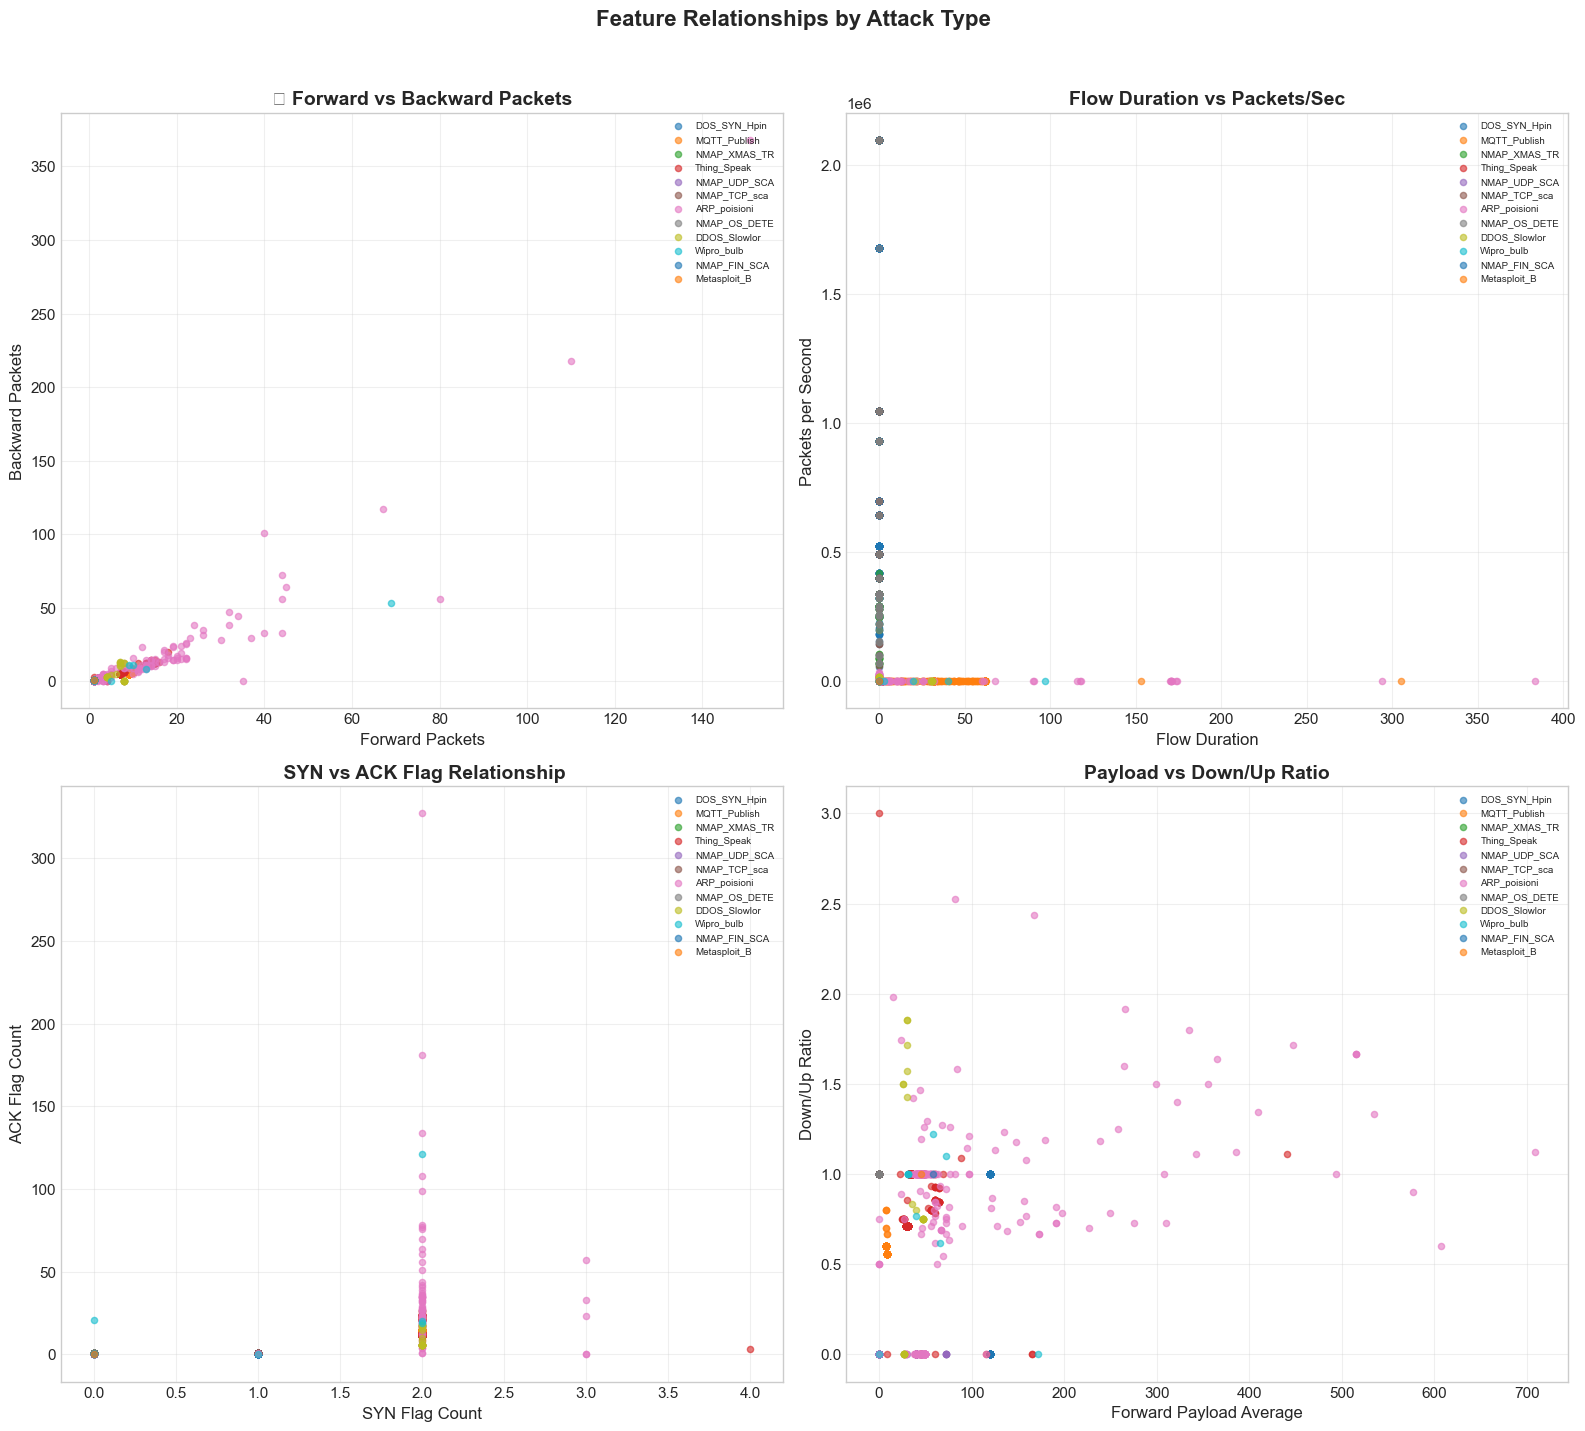

In [35]:
# Scatter plots showing relationships between key features
print("SCATTER PLOT ANALYSIS")
print("="*60)

# Sample for performance
scatter_sample = df.sample(min(5000, len(df)), random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Forward vs Backward Packets
ax1 = axes[0, 0]
for attack in scatter_sample['Attack_type'].unique():
    mask = scatter_sample['Attack_type'] == attack
    ax1.scatter(scatter_sample.loc[mask, 'fwd_pkts_tot'], 
                scatter_sample.loc[mask, 'bwd_pkts_tot'],
                label=attack[:12], alpha=0.6, s=20)
ax1.set_xlabel('Forward Packets')
ax1.set_ylabel('Backward Packets')
ax1.set_title('📊 Forward vs Backward Packets', fontweight='bold')
ax1.legend(fontsize=7, loc='upper right')
ax1.grid(alpha=0.3)

# Plot 2: Flow Duration vs Packets per Second
ax2 = axes[0, 1]
for attack in scatter_sample['Attack_type'].unique():
    mask = scatter_sample['Attack_type'] == attack
    ax2.scatter(scatter_sample.loc[mask, 'flow_duration'], 
                scatter_sample.loc[mask, 'flow_pkts_per_sec'],
                label=attack[:12], alpha=0.6, s=20)
ax2.set_xlabel('Flow Duration')
ax2.set_ylabel('Packets per Second')
ax2.set_title('Flow Duration vs Packets/Sec', fontweight='bold')
ax2.legend(fontsize=7, loc='upper right')
ax2.grid(alpha=0.3)

# Plot 3: SYN vs ACK Flags
ax3 = axes[1, 0]
for attack in scatter_sample['Attack_type'].unique():
    mask = scatter_sample['Attack_type'] == attack
    ax3.scatter(scatter_sample.loc[mask, 'flow_SYN_flag_count'], 
                scatter_sample.loc[mask, 'flow_ACK_flag_count'],
                label=attack[:12], alpha=0.6, s=20)
ax3.set_xlabel('SYN Flag Count')
ax3.set_ylabel('ACK Flag Count')
ax3.set_title(' SYN vs ACK Flag Relationship', fontweight='bold')
ax3.legend(fontsize=7, loc='upper right')
ax3.grid(alpha=0.3)

# Plot 4: Payload size vs Down/Up Ratio
ax4 = axes[1, 1]
for attack in scatter_sample['Attack_type'].unique():
    mask = scatter_sample['Attack_type'] == attack
    payload_col = 'fwd_pkts_payload.avg' if 'fwd_pkts_payload.avg' in scatter_sample.columns else 'fwd_pkts_tot'
    ax4.scatter(scatter_sample.loc[mask, payload_col], 
                scatter_sample.loc[mask, 'down_up_ratio'],
                label=attack[:12], alpha=0.6, s=20)
ax4.set_xlabel('Forward Payload Average')
ax4.set_ylabel('Down/Up Ratio')
ax4.set_title('Payload vs Down/Up Ratio', fontweight='bold')
ax4.legend(fontsize=7, loc='upper right')
ax4.grid(alpha=0.3)

plt.suptitle('Feature Relationships by Attack Type', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('scatter_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()